In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df_train = pd.read_csv("/home/spaceape/bachelor_thesis/data/gsc/cs-training.csv")
df_test = pd.read_csv("/home/spaceape/bachelor_thesis/data/gsc/cs-test.csv")

# 1. DATA WRANGLING
#count number of nans within each feature
nans_fa = pd.Series(df_train.isnull().sum(axis=0), name="nans")
nans_fa = nans_fa.sort_values(ascending=False)
nans_oa = pd.Series(df_train.isnull().sum(axis=1), name="nans")
nans_oa = nans_oa.sort_values(ascending=False)

nans_fa_test = pd.Series(df_test.isnull().sum(axis=0), name="nans")
nans_fa_test = nans_fa.sort_values(ascending=False)
nans_oa_test = pd.Series(df_test.isnull().sum(axis=1), name="nans")
nans_oa_test = nans_oa.sort_values(ascending=False)

print (nans_fa)

MonthlyIncome                           29731
NumberOfDependents                       3924
NumberOfTime60-89DaysPastDueNotWorse        0
NumberRealEstateLoansOrLines                0
NumberOfTimes90DaysLate                     0
NumberOfOpenCreditLinesAndLoans             0
DebtRatio                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
age                                         0
RevolvingUtilizationOfUnsecuredLines        0
SeriousDlqin2yrs                            0
Unnamed: 0                                  0
Name: nans, dtype: int64


In [3]:
print("%s train %s test" % (len(df_train), len(df_test)))

150000 train 101503 test


In [4]:
df_train.columns
#len(df_train.columns)

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [5]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df_test.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [7]:
# new feature
df_train["RepaymentHistory"] = pd.Series(index=df_train.index)
# df_train["RepaymentHistory"] = df_train["NumberOfTime30-59DaysPastDueNotWorse"].map(str) + df_train["NumberOfTime60-89DaysPastDueNotWorse"].map(str) + df_train["NumberOfTime60-89DaysPastDueNotWorse"].map(str) 
df_train["RepaymentHistory"] = df_train["NumberOfTime30-59DaysPastDueNotWorse"] + df_train["NumberOfTime60-89DaysPastDueNotWorse"]*2 + df_train["NumberOfTime60-89DaysPastDueNotWorse"]*3

df_test["RepaymentHistory"] = pd.Series(index=df_test.index)
df_test["RepaymentHistory"] = df_test["NumberOfTime30-59DaysPastDueNotWorse"] + df_test["NumberOfTime60-89DaysPastDueNotWorse"]*2 + df_test["NumberOfTime60-89DaysPastDueNotWorse"]*3

df_train.head()    

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RepaymentHistory
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,1
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1


In [8]:
# outcome variable
df_train["SeriousDlqin2yrs"].head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [9]:
# delete observations with 2 or more missing features
drp = nans_oa > 1
drp = drp[drp==True].index
df_train = df_train.drop(drp, axis=0)

nans_fa = pd.Series(df_train.isnull().sum(axis=0), name="nans")
nans_fa = nans_fa.sort_values(ascending=False)
nans_oa = pd.Series(df_train.isnull().sum(axis=1), name="nans")
nans_oa = nans_oa.sort_values(ascending=False)

nans_fa_test = pd.Series(df_test.isnull().sum(axis=0), name="nans")
nans_fa_test = nans_fa.sort_values(ascending=False)
nans_oa_test = pd.Series(df_test.isnull().sum(axis=1), name="nans")
nans_oa_test = nans_oa.sort_values(ascending=False)

In [18]:
df_test.shape

(101503, 13)

In [20]:
# substitute columns containing more than x% missing with median
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
for feature in df_train[:]:
    if feature != "RepaymentHistory":
        if (nans_fa[feature] > (0*len(df_train))):
            print (feature, nans_fa[feature])
            #df_train = df_train.drop(feature, 1)
            
df_train = pd.DataFrame(imp.fit_transform(df_train), index=df_train.index, columns=df_train.columns)

for feature in df_test[:]:
    if feature != "RepaymentHistory":
        if (nans_fa_test[feature] > (0*len(df_test))):
            print (feature, nans_fa_test[feature])
            
df_test = pd.DataFrame(imp.fit_transform(df_test), index=df_test.index, columns=df_test.columns)

nans_fa = pd.Series(df_train.isnull().sum(axis=0), name="nans")
nans_fa = nans_fa.sort_values(ascending=False)
nans_oa = pd.Series(df_train.isnull().sum(axis=1), name="nans")
nans_oa = nans_oa.sort_values(ascending=False)

nans_fa_test = pd.Series(df_test.isnull().sum(axis=0), name="nans")
nans_fa_test = nans_fa.sort_values(ascending=False)
nans_oa_test = pd.Series(df_test.isnull().sum(axis=1), name="nans")
nans_oa_test = nans_oa.sort_values(ascending=False)


MonthlyIncome 25807
MonthlyIncome 25807


ValueError: Shape of passed values is (12, 101503), indices imply (13, 101503)

In [17]:
nans_fa_test

MonthlyIncome                           25807
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
RepaymentHistory                            0
Name: nans, dtype: int64

In [155]:
df_train.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'RepaymentHistory'],
      dtype='object')

In [156]:
df_test.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'RepaymentHistory'],
      dtype='object')

In [157]:
df_train = df_train.drop(["Unnamed: 0"], 1)
df_test = df_test.drop(["Unnamed: 0", "SeriousDlqin2yrs"], 1)

In [158]:
len(df_train.columns)

12

In [159]:
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'RepaymentHistory'],
      dtype='object')

In [160]:
# drop the rest of the NANs. if previous steps done correctly - none will be removed
len(df_train)
df_train = df_train.dropna()
len(df_train)

146076

In [161]:
df_train["SeriousDlqin2yrs"].unique()

array([1., 0.])

In [162]:
df_train = df_train.reset_index(drop=True)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RepaymentHistory
0,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,2.0
1,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,1.0


In [163]:
factors = list()
for feat in df_train:
    if (type(df_train[feat][0]) == type("string")):
        factors.append(feat) 
        print (feat)

In [164]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
enc = OneHotEncoder()

for feat in df_train:
    if (feat in factors):
        print (feat, len(df_train[feat].unique()), df_train[feat].unique())
        df_train[feat] = le.fit_transform(df_train[feat])
        df_train[feat] = df_train[feat].reshape(len(df_train[feat], 1))
        df_train[feat] = enc.fit_transform()
    

# # encoding the factor variables
# for feat in df_train:
#     if (feat in factors):
#         print (feat, len(df_train[feat].unique()), df_train[feat].unique())
#         #if len(df_a[feat].unique()) < 10:
#         #    print(df_a[feat].unique())
#         #else:
#         #    print (df_a[feat].head())
#         #    print (len(df_a[feat].unique()))

#         #temp = lb.fit_transform(df_a[feat])
#         df_train[feat] = le.fit_transform(df_train[feat])
#         #df_a = df_a.add(temp, 1)
#         #print (df_a[feat])
        

In [165]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RepaymentHistory
0,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,2.0
1,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,1.0


In [166]:
ls = df_train["SeriousDlqin2yrs"].unique()
df_train["SeriousDlqin2yrs"].value_counts()

0.0    136229
1.0      9847
Name: SeriousDlqin2yrs, dtype: int64

In [134]:
# setting up the structure of dataset
# y_train = df_train["SeriousDlqin2yrs"]
# y_train = np.asarray(y_train, dtype=np.int)
# X_train = df_train.drop("SeriousDlqin2yrs", axis=1)
# X_train = np.asarray(X_train)

# y_test = df_test["SeriousDlqin2yrs"]
# y_test = np.asarray(y_test, dtype=np.int)
# X_test = df_test.drop("SeriousDlqin2yrs", axis=1)
# X_test = np.asarray(X_test)

# features = df_train.drop("SeriousDlqin2yrs", axis=1).columns

In [104]:
print("%s X_train %s y_train" % (X_train.shape, y_train.shape))

(146076, 11) X_train (146076,) y_train


In [175]:
X_train = np.asarray(df_train)
y_train = df_train["SeriousDlqin2yrs"]
X_test = np.asarray(df_test)

In [176]:
# 2. CROSS VALIDATION
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state = 10)

for train_index, test_index in skf.split(X_train, y_train):
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]
    
print("%s train %s test" % (len(y_train_train), len(y_train_test)))
X_train_train

127818 train 18258 test


array([[ 1.        ,  0.76612661, 45.        , ...,  0.        ,
         2.        ,  2.        ],
       [ 0.        ,  0.95715102, 40.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.65818014, 38.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.24604392, 58.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 30.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.85028295, 64.        , ...,  0.        ,
         0.        ,  0.        ]])

In [173]:
X_test

array([[8.85519080e-01, 4.30000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.63295269e-01, 5.70000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+00, 0.00000000e+00],
       [4.32750360e-02, 5.90000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+00, 0.00000000e+00],
       ...,
       [8.15963730e-02, 7.00000000e+01, 0.00000000e+00, ...,
        0.00000000e+00,            nan, 0.00000000e+00],
       [3.35456547e-01, 5.60000000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 3.00000000e+00, 5.00000000e+00],
       [4.41841663e-01, 2.90000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [171]:
print("%s min %s max" % (np.min(X_train_train[:,0]), np.max(X_train_train[:,0])))

0.0 min 1.0 max


In [177]:
# feature scaling - standardization
from sklearn import preprocessing
mascaler = preprocessing.MaxAbsScaler()
X_train_train = mascaler.fit_transform(X_train_train)
X_train_test = mascaler.fit_transform(X_train_test)
X_train_train

X_test = mascaler.fit_transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
selector1 = SelectKBest(f_classif)
selector2 = SelectKBest(chi2)
top_features1 = selector1.fit_transform(X_train, y_train)
top_features2 = selector2.fit_transform(X_train, y_train)
mask1 = selector1.get_support()
mask2 = selector2.get_support()
columns1 = []
columns2 = []

In [ ]:
for col in range(X_train.shape[1]):
    if mask1[col] == True:
        columns1.append(features[col])
    if mask2[col] == True:
        columns2.append(features[col])
        
sc1 = pd.DataFrame(selector1.scores_, columns=["anova"], index=features)
sc1 = sc1.sort_values(by=["anova"], ascending=False)
sc2 = pd.DataFrame(selector2.scores_, columns=["chi2"], index=features)
sc2 = sc2.sort_values(by=["chi2"], ascending=False)

In [ ]:
sc2

In [28]:
features1 = sc1[0:4].index
features2 = sc2[0:4].index
print(df_train.drop("SeriousDlqin2yrs", axis=1).columns)
X_train_train1 = X_train_train[:,[4,10]]
X_train_test1 = X_train_test[:,[4,10]]
print(X_train_test1.shape)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'RepaymentHistory'],
      dtype='object')
(18258, 2)


In [29]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X_train_train, y_train_train)
print(selector.ranking_)

NameError: name 'RandomForestClassifier' is not defined

In [73]:
# tmp = selector.ranking_ == 1
# a = pd.Series()
# for i in range(0, len(tmp)):
#     if tmp[i] == True:
#         a[len(a)] = i

In [74]:
df_train.drop("SeriousDlqin2yrs", axis=1).columns[[0,1,3,4,10]]

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'RepaymentHistory'],
      dtype='object')

In [75]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn import metrics
from scipy.stats import randint as sp_randint

# lr.fit(X_train_train, y_train_train)
# print ("logistic regression accuracy: ", lr.score(X_train_test, y_train_test))
# print ("logistic regression precision score: ",  precision_score(y_train_test, lr.predict(X_train_test)))
# print ("logistic regression recall score: ",  recall_score(y_train_test, lr.predict(X_train_test)))

lr.fit(X_train_train1, y_train_train)
print ("logistic regression accuracy: ", lr.score(X_train_test1, y_train_test))
print ("logistic regression precision score: ",  metrics.precision_score(y_train_test, lr.predict(X_train_test1)))
print ("logistic regression recall score: ",  metrics.recall_score(y_train_test, lr.predict(X_train_test1)))



logistic regression accuracy:  0.9326870412969657
logistic regression precision score:  0.5238095238095238
logistic regression recall score:  0.00894308943089431


In [76]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

parameters_rf = {"max_depth": [3, 20],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 15),
              "min_samples_leaf": sp_randint(1, 15),
              "n_estimators": sp_randint(10, 36),
              "bootstrap": [True],
              "criterion": ["gini", "entropy"]}
rf_opt = RandomizedSearchCV(rf, parameters_rf, 50)
rf_opt.fit(X_train_train, y_train_train)
print ("decision tree parameters: ", rf_opt.best_params_)
print ("decision tree accuracy: ",  rf_opt.best_estimator_.score(X_train_test, y_train_test))
#print ("decision tree best estimator: ",  dt_opt.best_estimator_)
print ("decision tree precision score: ",  metrics.precision_score(y_train_test, rf_opt.predict(X_train_test)))
print ("decision tree recall score: ",  metrics.recall_score(y_train_test, rf_opt.predict(X_train_test)))

KeyboardInterrupt: 

In [250]:
# SUPPORT VECTOR MACHINES
from sklearn import svm
svm = svm.SVC()

# parameters_svm = {"kernel" : ["linear", "rbf"],
#                   "C" : [1, 10, 30, 50, 70, 90, 110, 130, 150, 1000],
#                   "gamma" : [0, 0.001, 0.00001]}
# svm_opt = GridSearchCV(svm, parameters_svm)
# svm_opt.fit(X_train_train, y_train_train)
# print ("SVM parameters: ", svm_opt.best_params_)
# print ("SVM accuracy: ",  svm_opt.best_estimator_.score(X_train_test, y_train_test))
# #print ("SVM best estimator: ",  svma_opt.best_estimator_)
# print ("SVM precision score: ",  metrics.precision_score(y_train_test, svm_opt.predict(X_train_test)))
# print ("SVM recall score: ",  metrics.recall_score(y_train_test, svm_opt.predict(X_train_test)))

In [90]:
# MULTI LAYER PERCEPTRON - NEURAL NETWORK
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(5,5), random_state=1, learning_rate="adaptive", activation="relu")

mlp.fit(X_train_train, y_train_train)

pred = mlp.predict(X_train_test)

print ("confusion matrix: ", "\n", metrics.confusion_matrix(y_train_test, pred))
print ("accuracy score: ", metrics.accuracy_score(y_train_test, pred))
print ("precision score: ", metrics.precision_score(y_train_test, pred))
print ("recall score: ", metrics.recall_score(y_train_test, pred))
print ("F1 score: ", metrics.f1_score(y_train_test, pred))

confusion matrix:  
 [[17018    10]
 [ 1219    11]]
accuracy score:  0.9326870412969657
precision score:  0.5238095238095238
recall score:  0.00894308943089431
F1 score:  0.017585931254996006


In [35]:
#random seeds for stochastic parts of neural network 
np.random.seed(10)
from tensorflow import set_random_seed
set_random_seed(15)

from keras.models import Sequential
from keras.layers import Dense, Activation, Merge, Reshape, Dropout
from keras.layers.embeddings import Embedding

def model():
    model = Sequential()
    model.add(Dense(X_train_train.shape[0], input_dim=X_train_train.shape[1], activation="relu"))
    model.add(Dropout(0.15))
    model.add(Dense(15, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])
    return model

In [42]:
mod = model()
mod.fit(X_train_train, y_train_train, validation_split=0.25, epochs=2, batch_size=1024)

Train on 95863 samples, validate on 31955 samples
Epoch 1/2
95863/95863 [==============================] - 833s 9ms/step - loss: 0.2332 - acc: 0.9254 - val_loss: 0.1988 - val_acc: 0.9320
Epoch 2/2
95863/95863 [==============================] - 760s 8ms/step - loss: 0.2069 - acc: 0.9328 - val_loss: 0.1945 - val_acc: 0.9320


In [43]:
score = mod.evaluate(X_train_test, y_train_test, batch_size=512)
score

18258/18258 [==============================] - 86s 5ms/step


[0.19740941604585685, 0.9326322711641001]

In [78]:
len(df_test.columns)

11

In [79]:
len(df_train.columns)

12

In [181]:
preds = mod.predict_proba(X_test)
preds

array([[0.03319064],
       [0.02985696],
       [0.02236572],
       ...,
       [0.01445006],
       [0.08510649],
       [0.04873029]], dtype=float32)

In [192]:
len(preds)

101503

In [193]:
kaggle = pd.DataFrame(data=preds, index=range(1, len(df_test.index)+1), columns=["Probability"])

In [194]:
kaggle.to_csv("kaggle.csv")

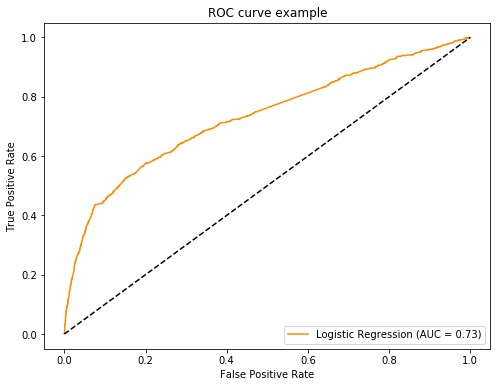

In [100]:
# METRICS

# ROC curve
pred = lr.predict_proba(X_train_test1)
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_train_test, pred[:, 1])
#fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
#fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm.predict(X_test))
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_train_test, mlp.predict_proba(X_train_test)[:, 1])


plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', label='Logistic Regression (AUC = %0.2f)' % metrics.auc(fpr_lr, tpr_lr))
#plt.plot(fpr_rf, tpr_rf, color='green', label='Logistic Regression (area = %0.2f)' % metrics.auc(fpr_rf, tpr_rf))
#plt.plot(fpr_mlp, tpr_mlp, color='blue', linestyle="-.", label='MLP (area = %0.2f)' % metrics.auc(fpr_mlp, tpr_mlp))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve example')
plt.legend(loc="lower right")
#plt.savefig("figures/ROC.eps")
plt.show()

One of the most important step is feature selection, as usually the best statistical machine learning models deals with it very effectively and not only select the best features but also create them from availiable variables. The more complex approach to feature selection is often refered as feature engineering which beside feature selection include creating a new features. People working on these models may utilitize their expertise from particular field in order to get more signal bearing features and thus better model.  
Regarding feature selection the lending club dataset has too high dimensionality as it contains a 137?? features, which is from modelling point of a view not applicable. The goal is to have model based on as few as possible features but with very high prediction and generalization ability. Thus is neccessary to execute so called feature selection - procces which helps to achieve those goals mentioned in previous sentence and also it usually improves estimators accuracy as well. 

describe at least one univariate and one multivariate feature selection method.

Popsat take obecne preprocessing - the majority of time during building of model is consumed by preprocessing steps - including data cleaning, data wrangling, etc 

(2004) evaluating...
The actual
mining or extraction of patterns from the data
requires the data to be clean since input data are
the primary, if not the only, source of knowledge
in these systems. Cleaning and preprocessing data
involves several steps including procedures for
handling incomplete, noisy, or missing data; sam-
pling of appropriate data; feature selection; feature
construction; and also formatting the data as per
the representational requirements of methods (e.g.,
decision trees, neural networks) used to extract
knowledge from these data.

conclusion describe
generally good performing nonlinear method